# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

In [253]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# esse decimal trocou a ',' pelo ponto
# tirar colunas vazias e colunas que não vão servir(estado civil, cargo)

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv',sep=';', decimal=',')                                                                           
clientes_df = pd.read_csv(r'CadastroClientes.csv',sep=';', decimal=',')
servicos_df = pd.read_excel(r'BaseServiçosPrestados.xlsx')

# Retirar coluna Estado Civil e Cargo da tabela funcionarios
# Axis=1 indica a coluna, axis=0 indica a linha
funcionarios_df = funcionarios_df.drop(['Estado Civil','Cargo'], axis=1)

display(funcionarios_df)
display(clientes_df)
display(servicos_df)


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Unnamed: 4,Unnamed: 5
0,OS0001,67,1,14,NaN,NaN
1,OS0002,17,2,12,NaN,NaN
2,OS0003,116,4,14,NaN,NaN
3,OS0004,37,5,8,NaN,NaN
4,OS0005,130,6,8,NaN,NaN
...,...,...,...,...,...,...
232,OS0233,111,315,4,NaN,NaN
233,OS0234,124,316,8,NaN,NaN
234,OS0235,72,317,6,NaN,NaN
235,OS0236,90,319,14,NaN,NaN


### 1 - Folha Salarial 
#### Supostamente estamos criando uma coluna Salario_Total - Estou procurando o salario total, como não tenhe a coluna, ela sera 'criada'.

###### 1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa?                                                     Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários

In [254]:
funcionarios_df['Total_Folha'] = funcionarios_df.loc[:,'Salario Base':'VR'].sum(axis=1)
total_folha_pagamento = funcionarios_df['Total_Folha'].sum(axis=0)
print('O Total da Folha de Pagamento é: \033[1;32mR$ {:,.2f}\033[m '.format(total_folha_pagamento))

O Total da Folha de Pagamento é: R$ 2,717,493.22 


### 2 - Faturamento da Empresa

#### Preciso cria uma  tabela auxiliar (valor contrato mensal, tempo total de contrato(meses)) 

####  preciso do ID do cliente que é quem relacionana as duas tabelas
#### IMPORTANTE: Ordem das tabelas: Devo colocar a tabela Caracteristica dentro da(s) tabela(s) a serem analisadas, a tabela caracterisitica é a tabela que tem os dados do CLIENTE, então ele vem primeiro.
#### on='ID Cliente'  --> 'on' informa a coluna que deve ser juntada

In [290]:
#f_t = pd.concat([clientes_df,servicos_df],axis=1)
#faturamento_empresa = f_t['Faturamento'] = f_t['Valor Contrato Mensal']*f_t['Tempo Total de Contrato (Meses)']
#fat_emp = faturamento_empresa.dropna(how='all').sum(axis=0)
#print('O Faturamento da Empresa foi: \033[1;32mR$ {:,.2f}\033[m'.format(fat_emp))  


f_t = servicos_df[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente','Valor Contrato Mensal']])
f_t['Faturamento Total'] = f_t['Tempo Total de Contrato (Meses)'] * f_t['Valor Contrato Mensal']
print('O Faturamento da Empresa foi: \033[1;32mR$ {:,.2f}\033[m'.format(sum(f_t['Faturamento Total'])))



O Faturamento da Empresa foi: R$ 5,519,160.00


### 3 - % Funcionarios Fecharam Contrato

In [286]:
#percent = (servicos_df['ID Funcionário'].nunique()/clientes_df['ID Cliente'].count())
#print('Percentual de Funcionarios que fecharam contrato: \033[1;32m{:.2%}\033[m'.format(1- percent))

a = len(servicos_df['ID Funcionário'].unique())
a_t = len(funcionarios_df['ID Funcionário'])
print('Percentual de Funcionarios que fecharam contrato: \033[1;32m{:.2%}\033[m'.format(a/a_t))


Percentual de Funcionarios que fecharam contrato: 86.84%


### 4 - Qtde Contratos por Área

In [280]:
# Calcule o total de contratos que cada área da empresa já fechou


# criando um dataframe(contratos_area_df), que no qual vai ser juntado: a tabela servico_df com a tabela funcionarios
# então to pegando as informaçoes da tabela funcionarios e jogando para dentro da tabela de serviços
# então primeiro coloco a tabela que vai receber as informações, e dentro do 'merge' coloco a tabela 
# que vai fornecer as informações
# então dentro do 'merge' coloco a tabela funcionarios_df e indico por meio do 'on' a coluna que quero juntar

#contratos_area_df = servicos_df.merge(funcionarios_df, on='ID Funcionário')
#contratos_area_df


# agora dentro do 'merge' passo a lista que quero pegar as informações -->
# merge(funcionarios_df[['ID Funcionário','Area']]')

# opcional --> passo uma lista para servicos_df[['ID Funcionario']], fazendo isso indico a coluna que deve ser relacionada,
# dentro do 'merge' --> na verdade em servicos_df não precisa ser informado 'ID Funcionario'

#contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário','Area']], on='ID Funcionário')
#contratos_area_df = servicos_df.merge(funcionarios_df[['ID Funcionário','Area']], on='ID Funcionário')
contratos_area_df = servicos_df.merge(funcionarios_df[['ID Funcionário','Area']], on='ID Funcionário')

#display(contratos_area_df)

contratos_area_qtde = contratos_area_df['Area'].value_counts() # contratos_area_df['Area'].value_counts() -->
# significa dizer que quero contar na coluna da AREA --> value_counts() ta contando os contratos por area
print(contratos_area_qtde)


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


### 5 - Funcioários por Área

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


<AxesSubplot:>

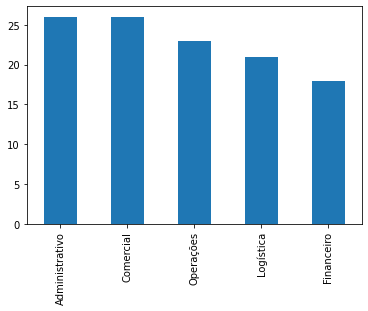

In [282]:
# Esta forma mostra mais não conta

# g = funcionarios_df.groupby('Area')
# for area, area_df in g:
    #print(area)
   # print()
   # print(area_df[['ID Funcionário','Area']].head())
    #print(area_df[['ID Funcionário','Area']])
   # print()


# Esta forma conta

# Quero contar quantas vezes os funcionarios aparecem por area dentro da tabela funcionarios_df

# entao é so fazer o value_counts() na tabela de funcionarios

funcionarios_por_area = funcionarios_df['Area'].value_counts() 

# funcionarios_por_area = quero contar a minha coluna de Area --> funcionario_df['Area'].value_counts()

print(funcionarios_por_area)

funcionarios_por_area.plot(kind='bar')   

### 6 - Ticket Médio Mensal

In [284]:

# Media --> Valor Contrato Mensal quanto que cada um paga em media

ticket = clientes_df['Valor Contrato Mensal'].mean()
print('Ticket Médio Mensal = R$ {:,.2f}'.format(ticket))            


Ticket Médio Mensal = R$ 2,502.56
